<a href="https://www.kaggle.com/code/sayedshaun/dogs-vs-cats?scriptVersionId=140484041" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train = "/kaggle/input/dogs-vs-cats/train"
test = "/kaggle/input/dogs-vs-cats/test"

train_data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = train_data_augmentation.flow_from_directory(
    directory=train,
    target_size= (256, 256),
    batch_size = 32,
    class_mode = "binary"
)


test_data = test_data_augmentation.flow_from_directory(
    directory=train,
    target_size= (256, 256),
    batch_size = 32,
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [3]:
train_data.image_shape

(256, 256, 3)

In [4]:
#CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = "relu"),
    tf.keras.layers.Dense(units = 64, activation = "relu"),
    tf.keras.layers.Dense(units=32, activation = "relu"),
    tf.keras.layers.Dense(units = 1, activation = "sigmoid") ,
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [5]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [6]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 178s 269ms/step - loss: 0.7851 - accuracy: 0.5492 - val_loss: 0.7201 - val_accuracy: 0.4832
Epoch 2/10
625/625 [==============================] - 112s 179ms/step - loss: 0.7228 - accuracy: 0.5077 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 3/10
625/625 [==============================] - 113s 181ms/step - loss: 0.6929 - accuracy: 0.5083 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 4/10
625/625 [==============================] - 113s 181ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 5/10
625/625 [==============================] - 113s 181ms/step - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 119s 191ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 124s 198ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 -

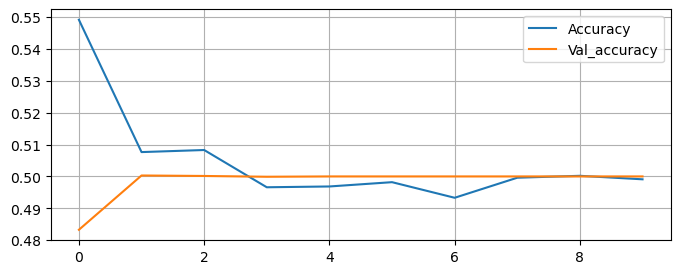

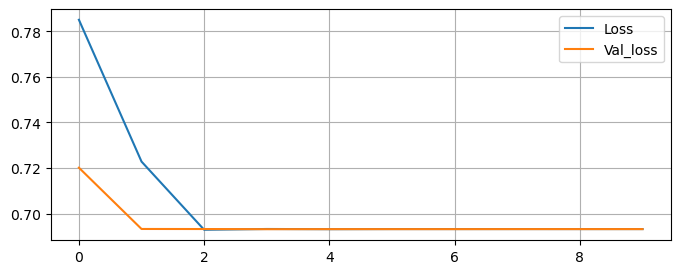

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 3])
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val_accuracy")
plt.legend()
plt.grid()

plt.figure(figsize=[8, 3])
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"],label = "Val_loss")
plt.legend()
plt.grid()